In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords  
sns.set(color_codes=True)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

corpus = pd.read_csv('boardgame-comments-sample.csv')

#lowercase and remove punctuation
corpus['cleaned'] = corpus['comment'].str.lower().apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

# stopword list to use
stopwords_list = stopwords.words('english')
stopwords_list.extend(('game','play')) # add 'game' to stopwords list

stopwords_list[-10:]

#remove stopwords
corpus['cleaned'] = corpus['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))


print('Mean: ', corpus.rating.mean())
print('Median: ', corpus.rating.median())
print('Mode: ', corpus.rating.mode())

Mean:  7.2516765053128704
Median:  7.5
Mode:  0    8.0
dtype: float64


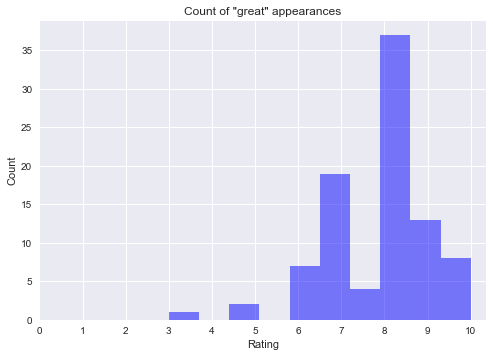

Mean: 7.851648351648351
Median: 8.0
Mode: 0    8.0
dtype: float64


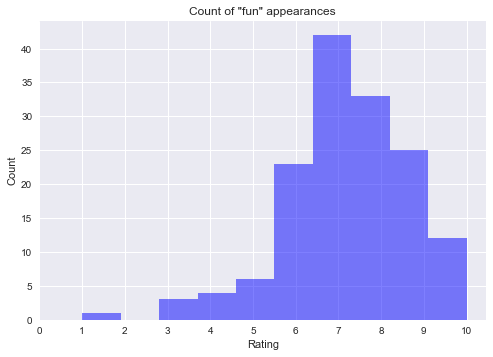

Mean: 7.273825503355706
Median: 7.0
Mode: 0    7.0
dtype: float64


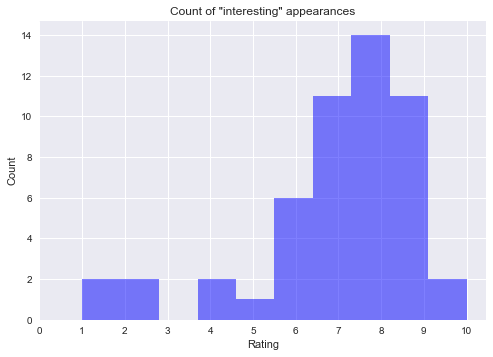

Mean: 6.978431372549019
Median: 7.5
Mode: 0    8.0
dtype: float64


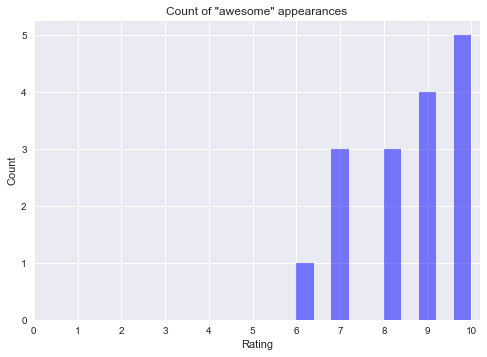

Mean: 8.55625
Median: 8.95
Mode: 0    10.0
dtype: float64


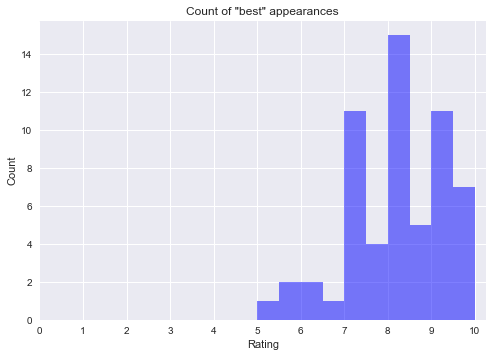

Mean: 8.026610169491526
Median: 8.0
Mode: 0    8.0
dtype: float64


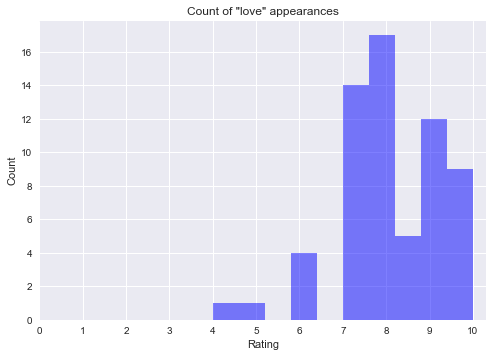

Mean: 8.095396825396826
Median: 8.0
Mode: 0    8.0
dtype: float64


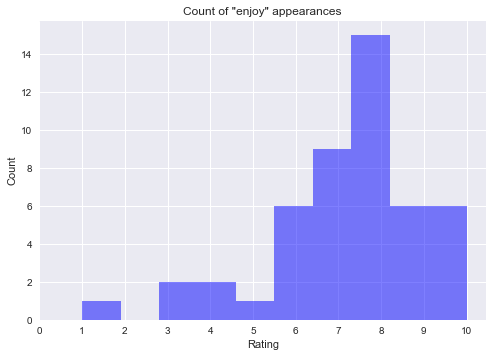

Mean: 7.297291666666667
Median: 7.5
Mode: 0    8.0
dtype: float64


In [2]:
#function that generates a histogram of how often a word appears with a rating
def word_rating(corpus, word):
    corpus['word'] = corpus['cleaned'].apply(lambda x: 1 if word in x.split() else 0)

    filtered = corpus.loc[corpus['word'] == 1]

    num_bins = 10
    n, bins, patches = plt.hist(filtered.rating, num_bins, facecolor='blue', alpha=0.5)

    plt.xticks(range(11))
    plt.title('Count of "' + str(word) + '" appearances')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()
    
    print("Mean: " + str(filtered.rating.mean() ))
    print("Median: " + str(filtered.rating.median() ))
    print("Mode: " + str(filtered.rating.mode() ))

  
#analyze what ratings are assigned when certain words are used
#avoid words like 'fun' or 'better', as it can be used in both positive and negative 
#contexts such as 'not fun' or 'could be better'

word_rating(corpus, "great")
word_rating(corpus, "fun")
word_rating(corpus, "interesting")
word_rating(corpus, "awesome")
word_rating(corpus, "best")
word_rating(corpus, "love")
word_rating(corpus, "enjoy")

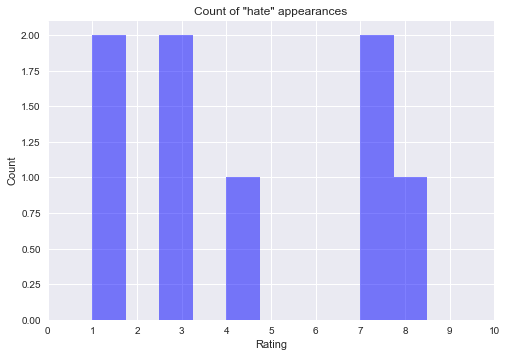

Mean: 4.3125
Median: 3.5
Mode: 0    1.0
1    3.0
2    7.0
dtype: float64


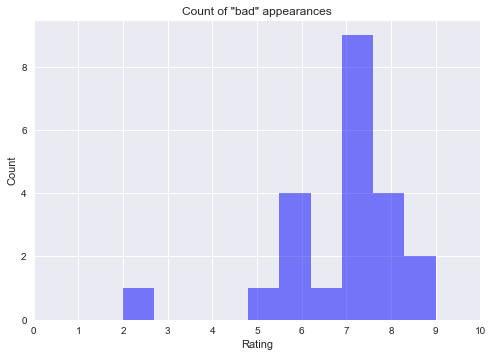

Mean: 6.840909090909091
Median: 7.0
Mode: 0    7.0
dtype: float64


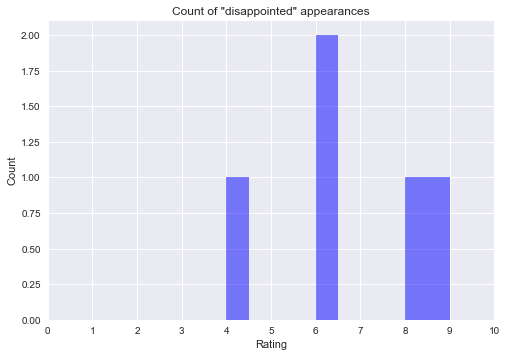

Mean: 6.6
Median: 6.0
Mode: 0    6.0
dtype: float64


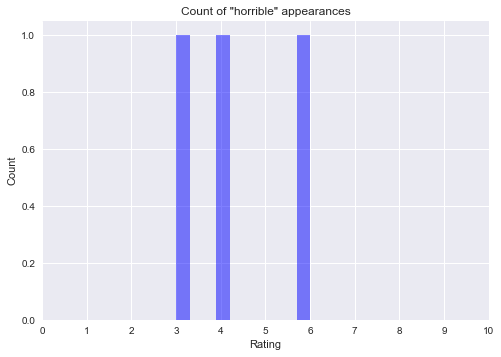

Mean: 4.333333333333333
Median: 4.0
Mode: 0    3.0
1    4.0
2    6.0
dtype: float64


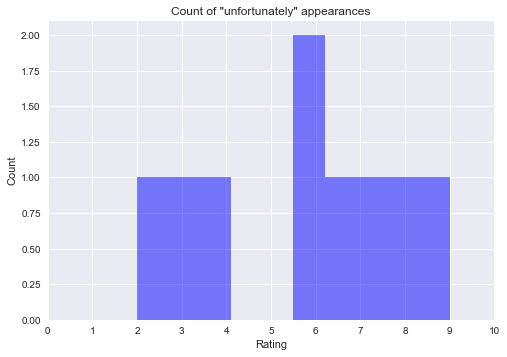

Mean: 5.722222222222222
Median: 6.0
Mode: 0    6.0
dtype: float64


In [3]:
word_rating(corpus, "hate")
word_rating(corpus, "bad")
word_rating(corpus, "disappointed")
word_rating(corpus, "horrible")
word_rating(corpus, "unfortunately")

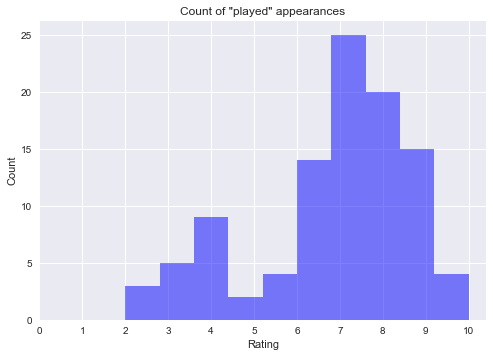

Mean: 6.783168316831683
Median: 7.0
Mode: 0    7.0
dtype: float64


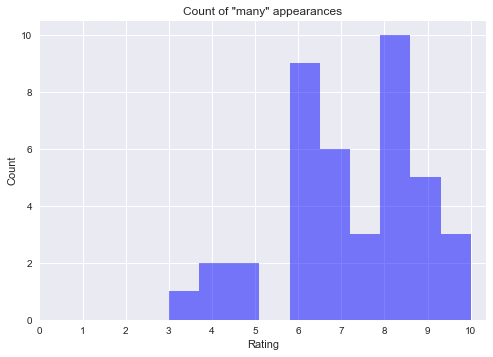

Mean: 7.19390243902439
Median: 7.25
Mode: 0    6.0
dtype: float64


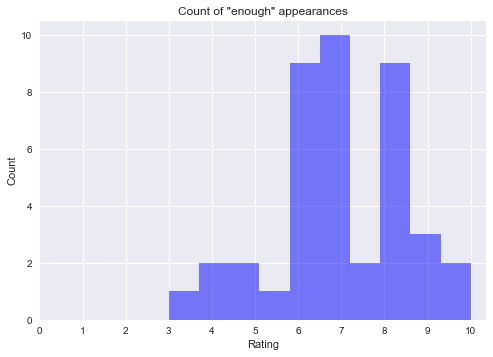

Mean: 6.949999999999999
Median: 7.0
Mode: 0    6.0
dtype: float64


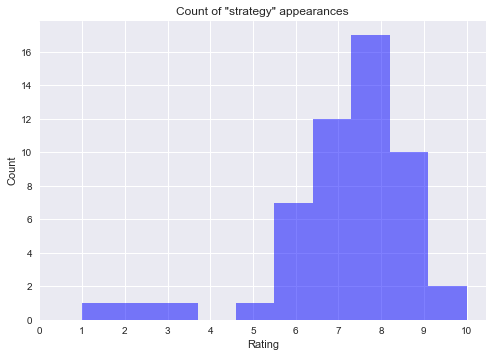

Mean: 7.245576923076924
Median: 7.5
Mode: 0    8.0
dtype: float64


In [4]:
word_rating(corpus, "played")
word_rating(corpus, "many")
word_rating(corpus, "enough")
word_rating(corpus, "strategy")

In [5]:
#decided to use median and select words to make rudimentary model
#great, 8
#fun, 7
#interesting, 7.5
#awesome, 8.95
#best, 8
#love, 8
#enjoy, 7.5
#hate, 3.5
#disappointed, 6
#horrible, 4
#unfortunately, 6


def make_rating(val):
    vals = [7.2]
    if 'great' in val:
        vals.append(8)
    if 'fun' in val:
        vals.append(7)
    if 'interesting' in val:
        vals.append(7.5)
    if 'awesome' in val:
        vals.append(8.95)
    if 'best' in val:
        vals.append(8)
    if 'love' in val:
        vals.append(8)
    if 'enjoy' in val:
        vals.append(7.5)
    if 'hate' in val:
        vals.append(3.5)
    if 'disappointed' in val:
        vals.append(6)
    if 'horrible' in val:
        vals.append(4)
    if 'unfortunately' in val:
        vals.append(6)
        
    #return mean
    return np.mean(vals)
    
corpus['prediction'] = corpus.cleaned.apply(make_rating)

In [6]:
corpus

,Compiled from boardgamegeek.com by Matt Borthwick,gameID,rating,comment,cleaned,word,prediction
0,25308,37111,8.50,++++ Thematic +++ Bluff - Many randomness I ...,thematic bluff many randomness really like one...,0,7.425000
1,54313,12,8.00,"""well, that ugly artwork certainly helped imme...",well ugly artwork certainly helped immerse egy...,0,7.200000
2,38165,50,8.00,LOVE this game! If only the GF would play it ...,love gf would tired end day basic math bad idea,0,7.600000
3,56936,1198,5.00,"SET is a good game, in small doses (in my case...",set good small doses case small doses simple c...,0,7.100000
4,47675,164153,6.00,"So much better than Descent. Better theme, imp...",much better descent better theme improved rule...,0,7.200000
5,94529,31260,8.00,Very tense and fun and I love pondering my str...,tense fun love pondering strategy beginning ra...,1,7.400000
6,122420,320,6.00,A classic.,classic,0,7.200000
7,55342,161970,4.50,rating based on 2 player game.,rating based 2 player,0,7.200000
8,147851,13,8.00,"A good game, but sometimes the dice are agains...",good sometimes dice,0,7.200000
9,171066,13291,7.00,Same rating as base game. New characters are g...,rating base new characters good doesnt add any...,0,7.200000


In [7]:
#find root mean square error, which measures how accurately the model predicts the response
rms = sqrt(mean_squared_error(corpus.rating,corpus.prediction))

mae = mean_absolute_error(corpus.rating, corpus.prediction)

print('Crude model')
print('RMSE:',rms)
print('MAE:', mae)


Crude model
RMSE: 1.614658878467762
MAE: 1.22321822117


In [8]:
#compare crude model to baseline model
#guess 7.5, the mean rating for everything

corpus['baseline_pred'] = 7.25

rms = sqrt(mean_squared_error(corpus.rating,corpus.baseline_pred))
mae = mean_absolute_error(corpus.rating, corpus.baseline_pred)

print('Baseline model')
print('RMSE:',rms)
print('MAE:', mae)

#crude model is only slightly better than baseline model 

Baseline model
RMSE: 1.6781802000808286
MAE: 1.27589138135
